# Ejecicio - Series temporales aleatorias y caóticas

El objetivo de este ejercicio es analizar dos series de datos provistas (*data1.txt* y *data2.txt*) para evaluar si se pueden distinguir datos de tipo aleatorio de los generados mediante transformaciones deterministas.

In [1]:
# import required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# import data to study
data1 = np.genfromtxt("../data/data1.txt")
data2 = np.genfromtxt("../data/data2.txt")

## Comparación

En primer lugar, se van a comparar las dos series $x(n)$ en función de $n$, para ver si se pueden apreciar diferencias cualitativas en su evolución temporal temporal. Dado que se dispone de 10169 puntos para cada serie, las dos señales no se pueden comparar de forma grafica para todo el rango de $n$ sino que se va a realizar la comparacion en rangos temporales más cortos (i.e. $1\leq n \leq 500$):

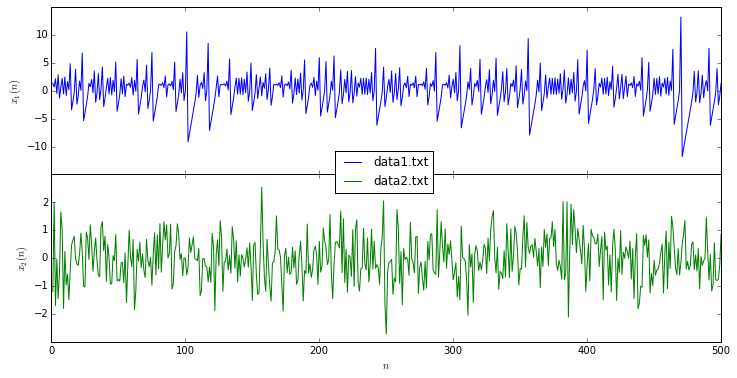

In [152]:
# n ranges (from 1 to 10169)
n_min = 1
n_max = 500
# plot figure with same axis
f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 6))
f.subplots_adjust(hspace=0) # no space between plots
# hide labels in joint axis
f.axes[0].get_yticklabels()[0].set_visible(False)
f.axes[1].get_yticklabels()[-0].set_visible(False)
# plot data and legend
n_values = np.linspace(n_min, n_max , n_max-n_min+1)
line1, = ax1.plot(n_values, data1[n_min-1:n_max], "b")
ax1.set_xlabel(u"$n$")
ax1.set_ylabel(u"$x_1(n)$")
line2, = ax2.plot(n_values, data2[n_min-1:n_max], "g")
ax2.set_xlabel(u"$n$")
ax2.set_ylabel(u"$x_2(n)$")
leg = f.legend((line1, line2), ('data1.txt', 'data2.txt'), loc=(0.455,0.49), frameon = True)
frame = leg.get_frame()
frame.set_facecolor('white')

En primer lugar se van a compar

In [126]:
np.linspace(1,20,20)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])

(array([  2.50000000e+01,   2.29000000e+02,   8.47000000e+02,
          2.02500000e+03,   2.88800000e+03,   2.43800000e+03,
          1.27400000e+03,   3.82000000e+02,   6.00000000e+01,
          1.00000000e+00]),
 array([-3.02090287, -2.37725527, -1.73360767, -1.08996007, -0.44631248,
         0.19733512,  0.84098272,  1.48463032,  2.12827792,  2.77192552,
         3.41557312]),
 <a list of 10 Patch objects>)

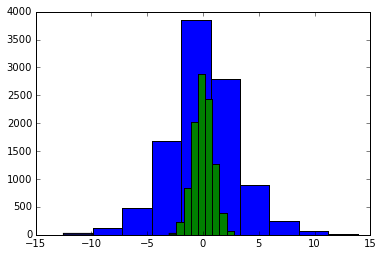

In [21]:
plt.hist(data1)
plt.hist(data2)

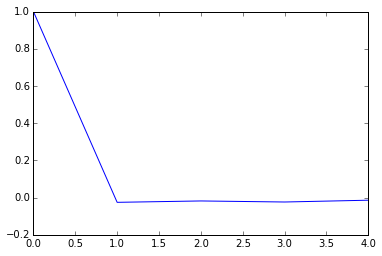

In [41]:
def autocorr(x):
    corr = np.correlate(data1, data1, mode='full')
    return corr[corr.size/2:]/corr.max()
plt.plot(autocorr(data2)[0:5])
